In [45]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, io

[[[0 4 0]
  [0 4 4]
  [0 0 0]
  ..., 
  [0 0 0]
  [4 0 0]
  [0 0 0]]

 [[0 4 4]
  [0 4 4]
  [0 0 0]
  ..., 
  [0 0 4]
  [4 4 0]
  [0 4 4]]

 [[0 4 4]
  [4 0 4]
  [0 4 0]
  ..., 
  [4 0 4]
  [4 0 4]
  [4 4 0]]

 ..., 
 [[0 4 4]
  [4 0 4]
  [0 4 0]
  ..., 
  [0 0 4]
  [4 4 0]
  [0 0 4]]

 [[0 4 4]
  [4 0 4]
  [0 4 0]
  ..., 
  [4 0 4]
  [4 0 4]
  [4 0 0]]

 [[0 4 4]
  [0 4 0]
  [0 4 0]
  ..., 
  [4 0 4]
  [4 4 0]
  [4 0 0]]]


/Users/tanakaed/anaconda/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: bits.baboon.png is a low contrast image
  warn('%s is a low contrast image' % fname)


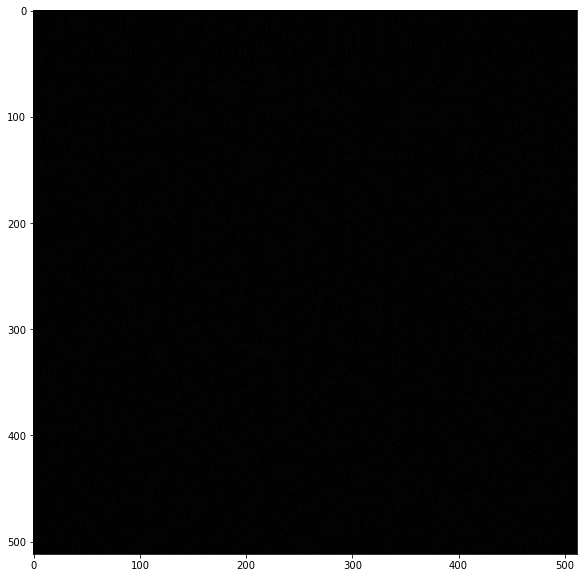

[4 0 4 ..., 4 4 0]


In [162]:
def get_bit(b, i):
    return (b >> i) & 1

def print_bits(img):    
    bits = np.bitwise_and(img, 1).flatten()    
    print(bits)

def write_bit(_byte, bit, i):
    bit_index = 2**i
    if bit == 0:
        return (_byte & ~bit_index)
    else:
        return (_byte | bit_index)

def write_message(input_file, output_file, message, bit_plane=0):
    bit_index_to_change = 2**bit_plane
    
    '''
    bit_plane: 0 is the least significant, 1 is the 2nd least significant
    '''
    img = io.imread(input_file)
    original_shape = img.shape
    img = img.flatten()
    message = message + '\0'
    ascii_bytes = [ord(c) for c in message]
        
    img_index = 0
    for message_index, ascii_byte in enumerate(ascii_bytes):
        for bit_index in range(7, -1, -1):            
            bit = get_bit(ascii_byte, bit_index)
            
            img[img_index] = write_bit(img[img_index], bit, bit_plane)
            img_index += 1
        
    io.imsave(output_file, img.reshape(original_shape))
    

def read_message(input_file, bit_plane=0):
    img = io.imread(input_file).flatten()
    decoded_message = ''
    char_byte = 0
    
    for img_index, cell in enumerate(img):
        bit_index = 7 - (img_index % 8)
        
        # get bit where message is hidden
        bit = get_bit(cell, bit_plane)
                
        # compose char byte
        char_byte = char_byte | (bit << bit_index)
            
        # completed one char
        if bit_index == 0 and img_index > 0:
            decoded_message += chr(char_byte)
            if char_byte == 0:
                break # end of message
            char_byte = 0 # reset 
         
    return decoded_message

def print_image(input_file):
    img = io.imread(input_file)
    plt.figure(figsize=(20,10))
    plt.imshow(img)    
    plt.show()
    plt.clf()
    
    print(img.flatten()[10:])

def read_file(input_file):
    with open(input_file, 'r') as myfile:
        data = myfile.read().replace('\n', '')
        return data
    
def main(): 
    message_file = 'message_small.txt'
    message_string = read_file(message_file)
    original_file = 'baboon.png'
    coded_file = 'encoded.baboon.png'
    bit_plane = 2
    
    write_message(original_file, coded_file, message_string, bit_plane)
    
    decoded_message = read_message(coded_file, bit_plane)
    print('decoded message:', decoded_message)

# main()
# print_image('baboon.png')
# print_image('encoded.baboon.png')


def print_bit_planes(input_file, output_file, bit_plane):
    img = io.imread(input_file)
    mask = 2 ** bit_plane
    bit_plane_img = np.bitwise_and(img, mask)
    print(bit_plane_img[:10][:10])
    io.imsave(output_file, bit_plane_img)
    
coded_file = 'encoded.baboon.png'
bit_plane_file = 'bits.baboon.png'
print_bit_planes(coded_file, bit_plane_file, 2)
print_image(bit_plane_file)